In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_arima = pd.read_csv('../output/prediccion_arima.csv')
df_prophet = pd.read_csv('../output/prediccion_prophet.csv')
df_rf = pd.read_csv('../output/prediccion_random_forest.csv')

df_arima['fecha'] = pd.to_datetime(df_arima['fecha'])
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_rf['ds'] = pd.to_datetime(df_rf['ds'])

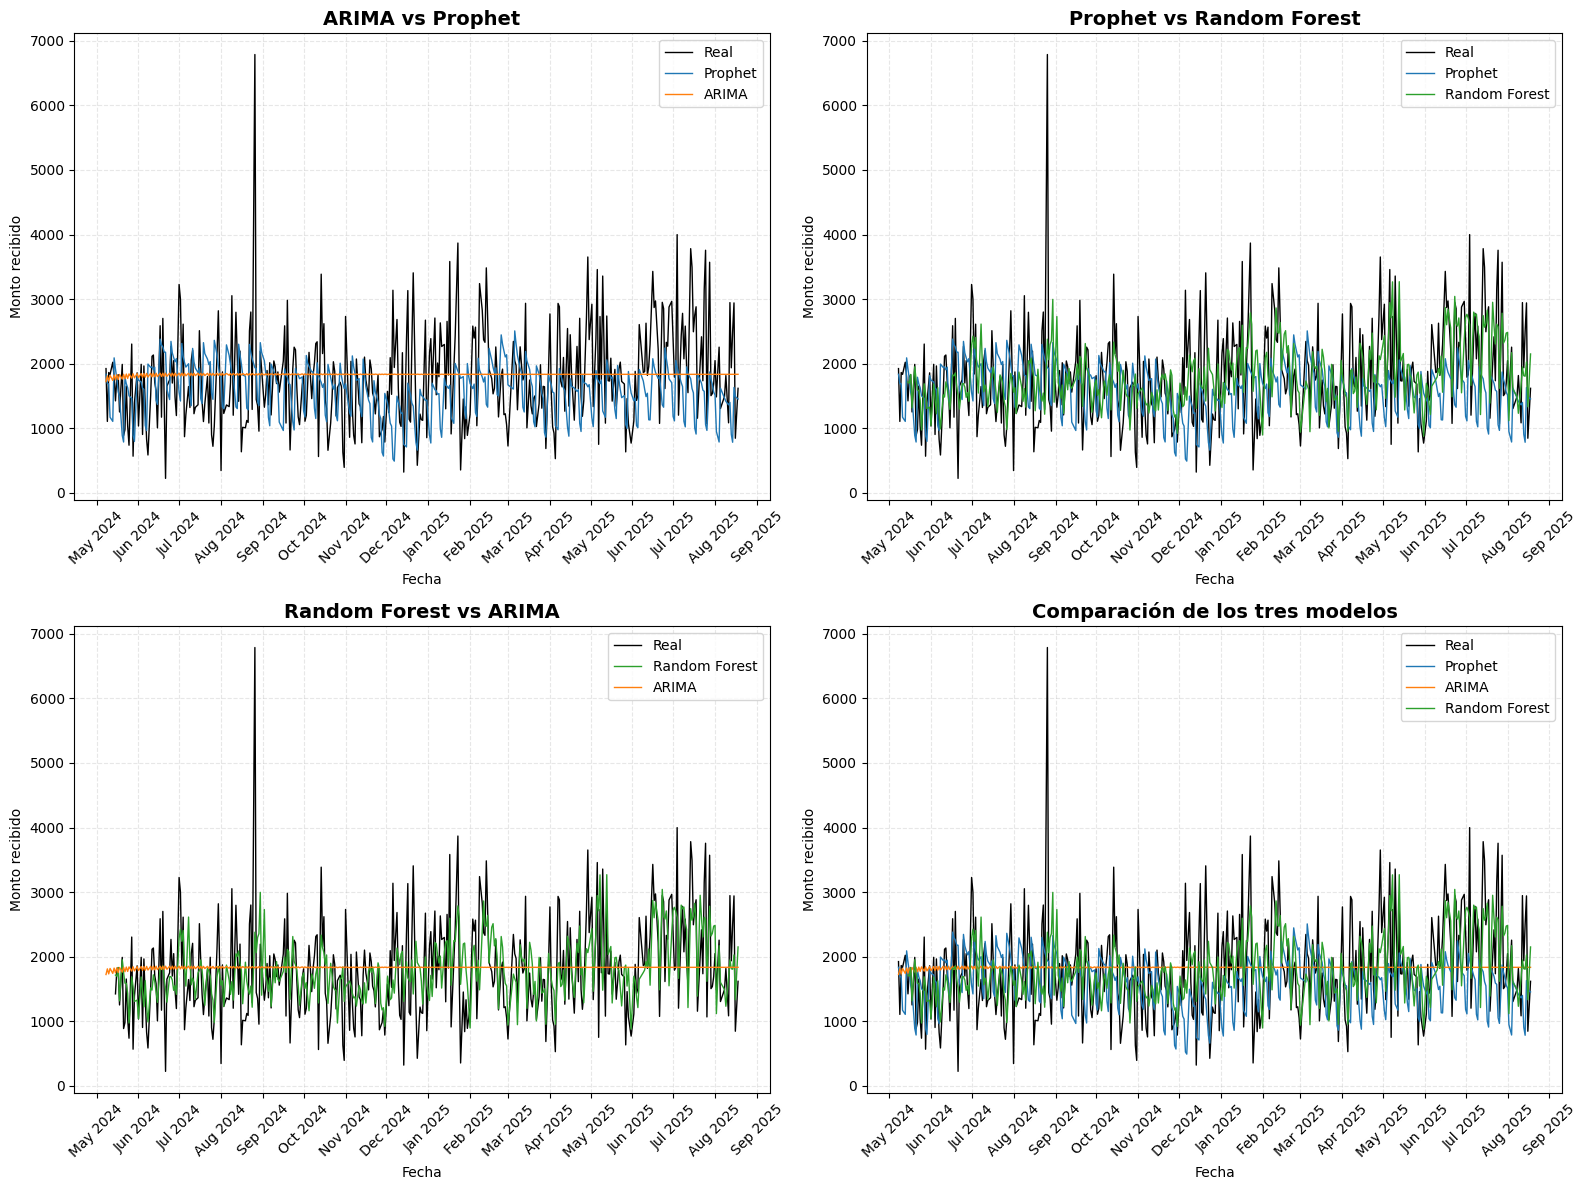

In [3]:
fechas_comunes = df_prophet['ds'].isin(df_arima['fecha'])
df_prophet = df_prophet[fechas_comunes].reset_index(drop=True)
df_arima = df_arima[df_arima['fecha'].isin(df_prophet['ds'])].reset_index(drop=True)
df_rf = df_rf[df_rf['ds'].isin(df_prophet['ds'])].reset_index(drop=True)

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. ARIMA vs Prophet
axs[0, 0].plot(df_prophet['ds'], df_prophet['real'], label='Real', color='black', linewidth=1)
axs[0, 0].plot(df_prophet['ds'], df_prophet['yhat'], label='Prophet', color='#1f77b4', linewidth=1)
axs[0, 0].plot(df_arima['fecha'], df_arima['prediccion'], label='ARIMA', color='#ff7f0e', linewidth=1)
axs[0, 0].set_title('ARIMA vs Prophet', fontsize=14, weight='bold')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Monto recibido')
axs[0, 0].legend()
axs[0, 0].grid(True, linestyle='--', alpha=0.3)
axs[0, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Prophet vs Random Forest
axs[0, 1].plot(df_prophet['ds'], df_prophet['real'], label='Real', color='black', linewidth=1)
axs[0, 1].plot(df_prophet['ds'], df_prophet['yhat'], label='Prophet', color='#1f77b4', linewidth=1)
axs[0, 1].plot(df_rf['ds'], df_rf['prediccion'], label='Random Forest', color='#2ca02c', linewidth=1)
axs[0, 1].set_title('Prophet vs Random Forest', fontsize=14, weight='bold')
axs[0, 1].set_xlabel('Fecha')
axs[0, 1].set_ylabel('Monto recibido')
axs[0, 1].legend()
axs[0, 1].grid(True, linestyle='--', alpha=0.3)
axs[0, 1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Random Forest vs ARIMA
axs[1, 0].plot(df_rf['ds'], df_rf['real'], label='Real', color='black', linewidth=1)
axs[1, 0].plot(df_rf['ds'], df_rf['prediccion'], label='Random Forest', color='#2ca02c', linewidth=1)
axs[1, 0].plot(df_arima['fecha'], df_arima['prediccion'], label='ARIMA', color='#ff7f0e', linewidth=1)
axs[1, 0].set_title('Random Forest vs ARIMA', fontsize=14, weight='bold')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].set_ylabel('Monto recibido')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle='--', alpha=0.3)
axs[1, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Comparación de los tres modelos
axs[1, 1].plot(df_prophet['ds'], df_prophet['real'], label='Real', color='black', linewidth=1)
axs[1, 1].plot(df_prophet['ds'], df_prophet['yhat'], label='Prophet', color='#1f77b4', linewidth=1)
axs[1, 1].plot(df_arima['fecha'], df_arima['prediccion'], label='ARIMA', color='#ff7f0e', linewidth=1)
axs[1, 1].plot(df_rf['ds'], df_rf['prediccion'], label='Random Forest', color='#2ca02c', linewidth=1)
axs[1, 1].set_title('Comparación de los tres modelos', fontsize=14, weight='bold')
axs[1, 1].set_xlabel('Fecha')
axs[1, 1].set_ylabel('Monto recibido')
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle='--', alpha=0.3)
axs[1, 1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
